# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background

Investments are increasingly in demand and a variety of alternative options are easily available, including investment platforms. One of the alternative investments and transactions in the financial world that is very high in use is cryptocurrency. Cryptocurrency is a digital currency and digital financial asset formed with blockchain technology as a control in payment transactions. One types of cryptocurrency that has a large transaction volume is Ethereum. Ethereum experienced an increase in price and is currently ranked second in Cryptocurrency. 

This project tried to capture the volatility of Ethereum's volume transaction from Januari 2023 to March 2023 in US Dollar (USD). The data were scrapped from `coingecko.com` . That is a website that allows us to check various data on different crypto assets. In addition, the world's largest independent source of reliable cryptocurrency data and frequently cited across the industry by various publications. The data on this website is updated monthly and provided by one of the financial leaders.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data?start_date=2022-01-01&end_date=2023-03-30#panel')

To visualize what exactly you get from the `request.get`, we can use `.content` so see what we exactly get. In here I slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js"></script><script async defer src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992"></script>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" '

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [4]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<html lang="en">
 <head>
  <script src="/cdn-cgi/apps/head/gYtXOyllgyP3-Z2iKTP8rRWGBm4.js">
  </script>
  <script async="" defer="" src="https://www.googleoptimize.com/optimize.js?id=GTM-W3CD992">
  </script>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="/favicon.ico" rel="shortcut icon"/>
  <link href="/OpensearchDescription.xml" rel="search" type="applica


The number "500" indicates how many characters you want to display. It can be 700, 1000, 858, etc. You can display or view them as conveniently as you want.

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. To find the right key on the website follow the steps below : 
1. Open the website page
2. Move cursor to the table 
3. Click on the right 
4. Inspect element 

The display will appear as shown below

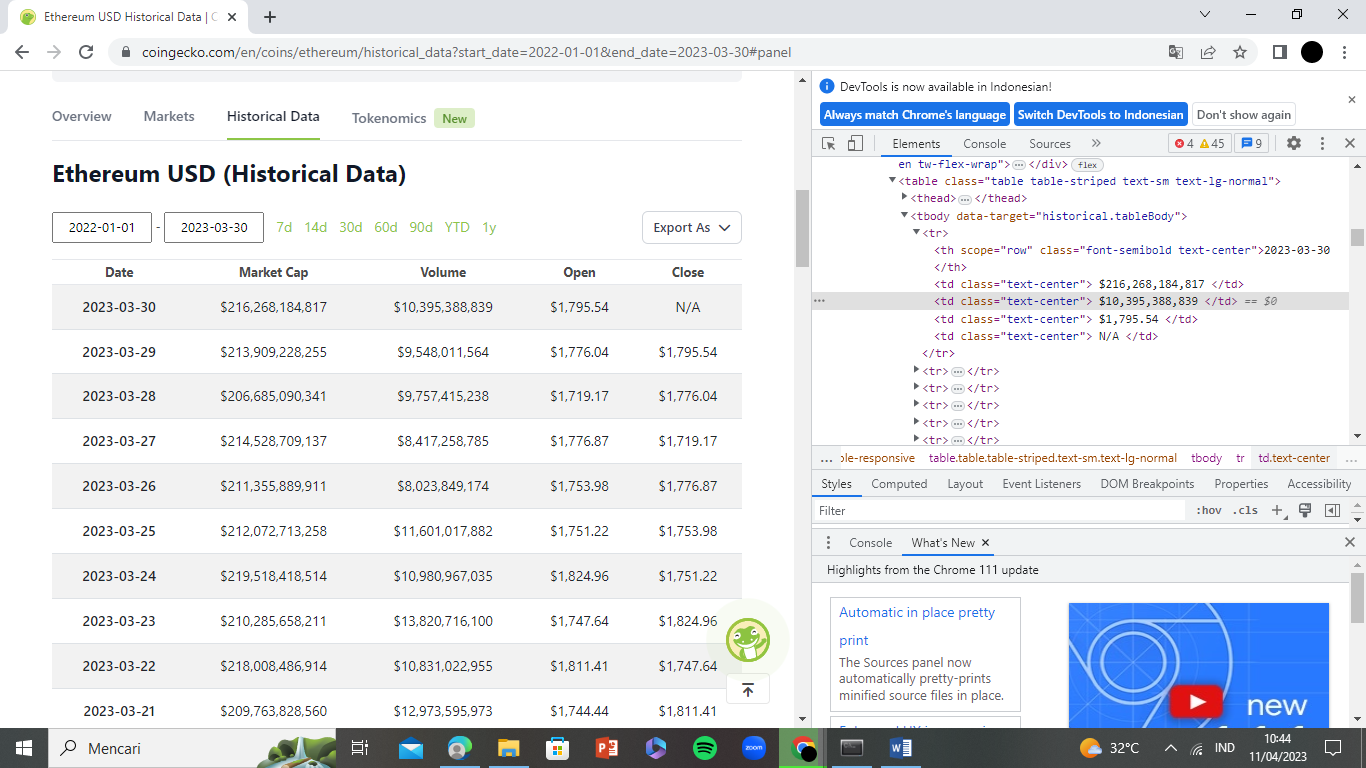

ssksk



Here, I use `tbody` as the key to get the whole information of the table that we want to scrap.

In [5]:
table = soup.find('tbody', attrs={'data-target':'historical.tableBody'})

In [6]:
print(table.prettify()[1:500])

tbody data-target="historical.tableBody">
 <tr>
  <th class="font-semibold text-center" scope="row">
   2023-03-30
  </th>
  <td class="text-center">
   $216,268,184,817
  </td>
  <td class="text-center">
   $10,395,388,839
  </td>
  <td class="text-center">
   $1,795.54
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2023-03-29
  </th>
  <td class="text-center">
   $213,909,228,255
  </td>
  <td class="text-center">
   $9,5


From the table above, we want to scrap two information such as date and volume. We can see that the right key to get the date is `<th class='scope':'row'>`. So, we use `find_all()` to get all of the rows that we want. Furthermore, we will also use key `<td class="text-center">` to get the volume.

In [7]:
table.find_all('th', attrs={'scope':'row'})[:5]

[<th class="font-semibold text-center" scope="row">2023-03-30</th>,
 <th class="font-semibold text-center" scope="row">2023-03-29</th>,
 <th class="font-semibold text-center" scope="row">2023-03-28</th>,
 <th class="font-semibold text-center" scope="row">2023-03-27</th>,
 <th class="font-semibold text-center" scope="row">2023-03-26</th>]

0 indicates the first row to be retrieved due to Phyton's zero-based indexing system.

In [8]:
table.find_all('th', attrs={'scope':'row'})[0].text

'2023-03-30'

5 indicates the fourth row

In [9]:
#get volume
table.find_all('td', attrs={'class':'text-center'})[5]

<td class="text-center">
$9,548,011,564
</td>

Finding row length.

In [10]:
row = table.find_all('th', attrs={'scope':'row'})
row_length = len(row)
row_length

60

In [14]:
rows = table.find_all('tr')
print(rows.prettify()[1:500])

AttributeError: ResultSet object has no attribute 'prettify'. You're probably treating a list of elements like a single element. Did you call find_all() when you meant to call find()?

The next step is scrapping. 

I used loop to write all the information needed. Then, I create a placeholder to receive the trimmed information and named is `temp`. The loop range starts from 0 to the length of the table row.

There are 2 steps to do scrapping on this website :

1. Retrieve data containing `Date` from all rows
2. Retrieve data containing `Volume` from all rows

Then, I will add them into the tuple that I have prepared before and changed the order from the oldest to the newest. Let's take a look at the following code !

In [12]:
temp = [] #initiating a tuple

for i in range(0, row_length):
    
    #get date 
    Date_Ethereum = table.find_all('th', attrs={'class':'font-semibold text-center'})[i].text

    #get volume 
    Volume = table.find_all('td', attrs={'class':'text-center'})[i * 4 + 1].text
    Volume = Volume.strip() #to remove excess white space
    
    temp.append((Date_Ethereum,Volume)) 
temp[:20]

[('2023-03-30', '$10,395,388,839'),
 ('2023-03-29', '$9,548,011,564'),
 ('2023-03-28', '$9,757,415,238'),
 ('2023-03-27', '$8,417,258,785'),
 ('2023-03-26', '$8,023,849,174'),
 ('2023-03-25', '$11,601,017,882'),
 ('2023-03-24', '$10,980,967,035'),
 ('2023-03-23', '$13,820,716,100'),
 ('2023-03-22', '$10,831,022,955'),
 ('2023-03-21', '$12,973,595,973'),
 ('2023-03-20', '$10,745,813,975'),
 ('2023-03-19', '$11,976,182,095'),
 ('2023-03-18', '$14,459,727,611'),
 ('2023-03-17', '$30,201,930,395'),
 ('2023-03-16', '$17,257,648,020'),
 ('2023-03-15', '$19,833,762,798'),
 ('2023-03-14', '$65,211,714,925'),
 ('2023-03-13', '$13,967,891,188'),
 ('2023-03-12', '$18,345,198,261'),
 ('2023-03-11', '$14,696,381,617')]

In [13]:
#Reverse
temp = temp[::-1]
temp[:10]

[('2023-01-30', '$10,037,370,816'),
 ('2023-01-31', '$10,977,781,768'),
 ('2023-02-01', '$7,544,090,212'),
 ('2023-02-02', '$9,295,116,916'),
 ('2023-02-03', '$12,542,560,274'),
 ('2023-02-04', '$9,528,083,088'),
 ('2023-02-05', '$6,766,208,820'),
 ('2023-02-06', '$8,211,226,952'),
 ('2023-02-07', '$7,825,100,535'),
 ('2023-02-08', '$9,180,247,306')]

## Creating data frame & Data wrangling

Put the array into dataframe

In [14]:
#View the table data frame for Date and Volume
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date_Ethereum','Volume'))
df.head()

,Date_Ethereum,Volume
0,2023-01-30,"$10,037,370,816"
1,2023-01-31,"$10,977,781,768"
2,2023-02-01,"$7,544,090,212"
3,2023-02-02,"$9,295,116,916"
4,2023-02-03,"$12,542,560,274"


In [15]:
#Check data types
df.dtypes

Date_Ethereum    object
Volume           object
dtype: object

Do the data cleansing 

> 1. Convert date column type to datetype64
> 2. Remove commas and IDR so the volume column can be converted to float
> 3. Create a new column called `month` and change the data type to `category` because we want to create a visualization for each month
> 4. Check missing value

In [16]:
#Change data type date ethereum
df['Date_Ethereum'] = df['Date_Ethereum'].astype('datetime64')

In [17]:
#Change data type volume
df['Volume'] = df['Volume'].map(lambda x: x.lstrip('$'))
df['Volume'] = df['Volume'].str.replace(",","")
df['Volume'] = df['Volume'].astype('float64')

In [18]:
#Create column Month and change the data type
df['Month'] = df["Date_Ethereum"].dt.month_name()
df['Month'] = df['Month'].astype('category')

In [19]:
#Check missing value
df.isna().sum()

Date_Ethereum    0
Volume           0
Month            0
dtype: int64

In [20]:
df.dtypes

Date_Ethereum    datetime64[ns]
Volume                  float64
Month                  category
dtype: object

In [21]:
df['Month'].unique()

['January', 'February', 'March']
Categories (3, object): ['February', 'January', 'March']

Data Visualisation

We have cleaned time series data of ethereum volume transactions. We want to know the volatility of the volume on a monthly basis. Therefore, we create a line plot to get the information we want. Remember to set the index before plotting.

In [22]:
df = df.set_index('Date_Ethereum')

<AxesSubplot:xlabel='Date_Ethereum'>

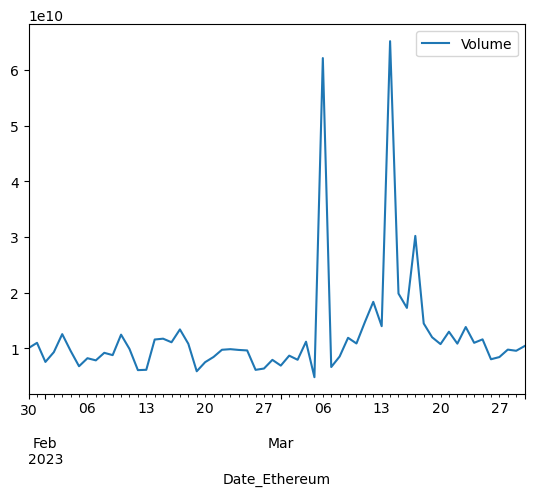

In [23]:
df.plot.line()

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


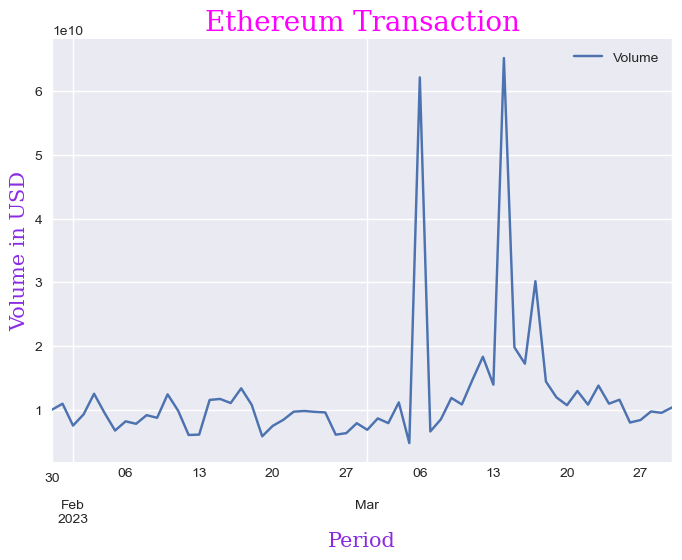

In [24]:
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use('seaborn')

font1 = {'family':'serif','color':'magenta','size':20}
font2 = {'family':'serif','color':'blueviolet','size':15}



ax = df.plot()
ax.set_ylabel("Volume in USD", fontdict=font2)
ax.set_title("Ethereum Transaction", fontdict=font1)
ax.set_xlabel("Period", fontdict=font2)
plt.show()

<AxesSubplot:xlabel='Date_Ethereum'>

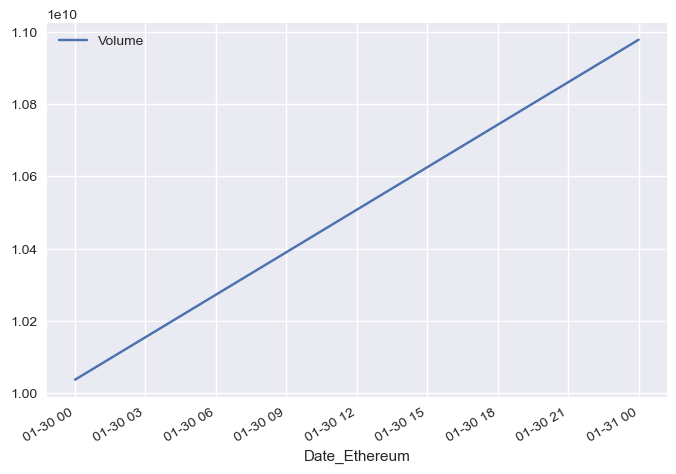

In [25]:
df[df['Month']== 'January'].plot()

<AxesSubplot:xlabel='Date_Ethereum'>

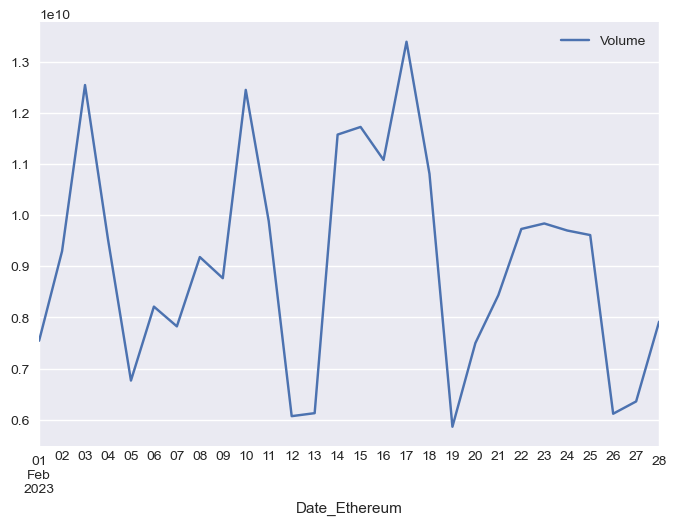

In [26]:
df[df['Month']== 'February'].plot()

<AxesSubplot:xlabel='Date_Ethereum'>

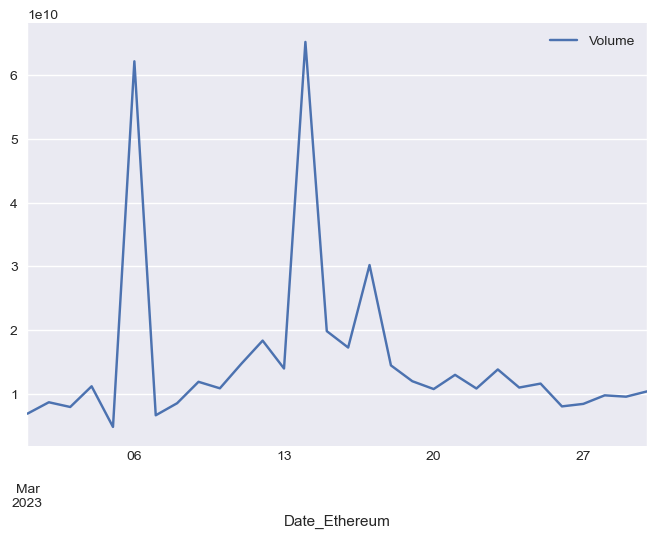

In [27]:
df[df['Month']== 'March'].plot()

## Conclusion

There are several insights that we can get from the line plot above:

1. The volume of sales has been fluctuated for each month
2. There are two extreme spike of volume on March 2023
3. The average of the monthly sales on February 2023 is more fluctuated than others
4. There were an increase of volume transaction during January 2023

In conclusion, the average of volume transaction is the monthly transaction has been fluctuating from time to time.

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

### Implement it at the webapps

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.